In [ ]:
import pygwalker as pyg
import pandas as pd
from pyspark.sql import SparkSession
from ydata_profiling import ProfileReport

In [19]:
df = pd.read_csv("/Users/witchaponkasettrakarn/Desktop/2025/Project_2025/AI pharmacy/dataset.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 72 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x1        183 non-null    object 
 1   x2        183 non-null    object 
 2   x3        183 non-null    object 
 3   x4        183 non-null    object 
 4   x5        183 non-null    float64
 5   x6        183 non-null    float64
 6   x7        183 non-null    float64
 7   x8        183 non-null    float64
 8   x9        183 non-null    float64
 9   x10       183 non-null    float64
 10  x11       183 non-null    float64
 11  x12       183 non-null    float64
 12  x13       183 non-null    float64
 13  x14       183 non-null    float64
 14  x15       183 non-null    float64
 15  x16       183 non-null    float64
 16  x17       183 non-null    float64
 17  x18       183 non-null    float64
 18  x19       183 non-null    float64
 19  x20       183 non-null    float64
 20  x21       183 non-null    float6

In [21]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

# Create overlapping histograms for Y 10 min, Y 15 min, and Y 20 min
fig_multi_hist = go.Figure()
fig_multi_hist.add_trace(go.Histogram(x=df['Y 10 min'], name='Y 10 min', opacity=0.8))
fig_multi_hist.add_trace(go.Histogram(x=df['Y 15 min'], name='Y 15 min', opacity=0.8))
fig_multi_hist.add_trace(go.Histogram(x=df['Y 20 min'], name='Y 20 min', opacity=0.8))
fig_multi_hist.add_trace(go.Histogram(x=df['Y 30 min'], name='Y 10 min', opacity=0.8))
fig_multi_hist.add_trace(go.Histogram(x=df['Y 45 min'], name='Y 15 min', opacity=0.8))
fig_multi_hist.add_trace(go.Histogram(x=df['Y 60 min'], name='Y 20 min', opacity=0.8))



# Update layout for better readability
fig_multi_hist.update_layout(
    title='Comparison of Y',
    xaxis_title='Values',
    yaxis_title='Frequency',
    barmode='overlay',  # Overlap the histograms
    template='plotly'
)

# Show the plot
fig_multi_hist.show()



# Pie chart for customer segmentation by 'x1'
fig_pie = px.pie(
    df, 
    names='x1', 
    title='Customer Segmentation by x1',
    hole=0.3,  # Makes it a donut chart
    template='plotly',
    labels={'x1': 'Segment'}
)
fig_pie.update_traces(textinfo='percent+label')
fig_pie.show()

# Group by x1 and x57, calculate the count
category_distribution = df.groupby(['x1', 'x57']).size().reset_index(name='Count')

# Stacked bar chart with raw counts
fig = px.bar(
    category_distribution, 
    x='x1', 
    y='Count', 
    color='x57',
    title='Raw Distribution of x57 Categories in Each x1 Class',
    labels={'x1': 'Class (x1)', 'x57': 'x57 Category'},
    barmode='stack'
)
fig.show()

In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from tabulate import tabulate


def show_feature_null(df, name):
    value_counts = df[df[name].notnull()][name].value_counts()

    output.clear_output()
    with output:
        print(f"\n🔹 Feature: {name}\n")
        print(tabulate(value_counts.reset_index(), headers=[
              "Value", "Count"], tablefmt="pretty"))


dark_style = widgets.Layout(
    background_color='#222222',  # สีดำเข้ม
    color='white',  # สีตัวอักษรเป็นขาว
    border='1px solid white'
)
feature_dropdown = widgets.Dropdown(
    options=df.columns,
    description='Feature:',
    style={'description_width': 'initial'},
    layout=dark_style
)

button = widgets.Button(description="Show Value Counts",
                        layout=dark_style)
output = widgets.Output()


def on_button_click(b):
    show_feature_null(df, feature_dropdown.value)


button.on_click(on_button_click)
display(feature_dropdown, button, output)

Dropdown(description='Feature:', layout=Layout(border='1px solid white'), options=('x1', 'x2', 'x3', 'x4', 'x5…

Button(description='Show Value Counts', layout=Layout(border='1px solid white'), style=ButtonStyle())

Output()

In [22]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# สมมติว่า DataFrame ชื่อ df
# กำหนดคอลัมน์ที่ต้องการทำการ value count
columns = df.columns

# สร้าง subplot แบบ 1 แถว 1 คอลัมน์
fig = make_subplots(rows=1, cols=1)

# ฟังก์ชั่นในการสร้างกราฟ bar chart   สำหรับแต่ละคอลัมน์
def create_bar_chart(col):
    # คำนวณ value counts ของคอลัมน์
    value_counts = df[col].value_counts()
    
    # สร้าง bar chart
    bar_chart = go.Bar(
        x=value_counts.index.astype(str),  # แปลงค่าเป็น string เพื่อแสดงในแกน X
        y=value_counts.values,
        name=col,
        text=value_counts.values,  # แสดงตัวเลขที่เป็นค่าของ bar
        textposition='auto'  # วางตัวเลขไว้บน bar โดยอัตโนมัติ
    )
    
    return bar_chart

# สร้างกราฟ bar chart สำหรับแต่ละคอลัมน์
buttons = []
for i, col in enumerate(columns):
    bar_chart = create_bar_chart(col)
    
    # เพิ่มกราฟลงใน subplot
    fig.add_trace(bar_chart)
    
    # เพิ่มปุ่มใน dropdown menu สำหรับเลือกแต่ละคอลัมน์
    buttons.append(dict(
        label=col,
        method="update",
        args=[{"visible": [True if j == i else False for j in range(len(columns))]},
              {"title": f"Value Counts of {col}"}]
    ))

# กำหนด layout สำหรับ dropdown menu และกราฟ
fig.update_layout(
    title="Select a Column to View Value Counts",
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        showactive=True,
        x=0.17,
        xanchor="left",
        y=1.15,
        yanchor="top"
    )],
    showlegend=False,
    xaxis_title="Attribute Values",  # ชื่อแกน X
    yaxis_title="Count"  # ชื่อแกน Y
    ,yaxis_type="log",  # ใช้ log scale สำหรับแกน Y
)

# แสดงผลกราฟ
fig.show()

In [23]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px


# Function to display scatter plot
def show_scatter_plot(df, feature1, feature2):
    """
    Display a scatter plot based on the selected two features.
    """
    output.clear_output()
    if feature1 and feature2:
        with output:
            fig = px.scatter(
                df,
                x=feature1,
                y=feature2,
                color='x1', 
                title=f'Scatter Plot: {feature1} vs {feature2}',
                labels={feature1: feature1, feature2: feature2},
                template='seaborn'
            )
            fig.show()
    else:
        with output:
            print("Please select both features to plot.")

# Create dropdown widgets for feature selection
feature1_dropdown = widgets.Dropdown(
    options=df.columns,
    description='Feature 1 (X):',
    style={'description_width': 'initial'},
    layout=dark_style
)

feature2_dropdown = widgets.Dropdown(
    options=df.columns,
    description='Feature 2 (Y):',
    style={'description_width': 'initial'},
    layout=dark_style
)

# Create button
button = widgets.Button(
    description="Show Scatter Plot",
    layout=dark_style
)

# Output area
output = widgets.Output()

# Button click handler
def on_button_click(b):
    feature1 = feature1_dropdown.value
    feature2 = feature2_dropdown.value
    show_scatter_plot(df, feature1, feature2)

button.on_click(on_button_click)

# Display widgets and output
display(feature1_dropdown, feature2_dropdown, button, output)


Dropdown(description='Feature 1 (X):', layout=Layout(border='1px solid white'), options=('x1', 'x2', 'x3', 'x4…

Dropdown(description='Feature 2 (Y):', layout=Layout(border='1px solid white'), options=('x1', 'x2', 'x3', 'x4…

Button(description='Show Scatter Plot', layout=Layout(border='1px solid white'), style=ButtonStyle())

Output()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_parquet("full_cleaned_EDDY_data.parquet")
df['date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))
df.set_index('date',inplace=True)

/var/folders/y0/rxhb39k14694wzz78x4wpwkr0000gn/T/ipykernel_33797/1981305951.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['Month'] + ' ' + df['Year'].astype(str))


In [2]:
df

,Product,Customer_name,Year,Month,Quarter,Purchase_amount
date,,,,,,
2018-04-01,110100570122--AMI,28,2018,April,2,5250
2018-04-01,110100570122--AMI,38,2018,April,2,3500
2018-04-01,110100570122--AMI,39,2018,April,2,875
2018-04-01,110100570122--AMI,42,2018,April,2,525
2018-04-01,110100570122--AMI,50,2018,April,2,700
...,...,...,...,...,...,...
2025-10-01,110100570122--AMI,1484,2025,October,4,39
2025-10-01,110100570122--AMI,1485,2025,October,4,67
2025-10-01,110100570122--AMI,1486,2025,October,4,493


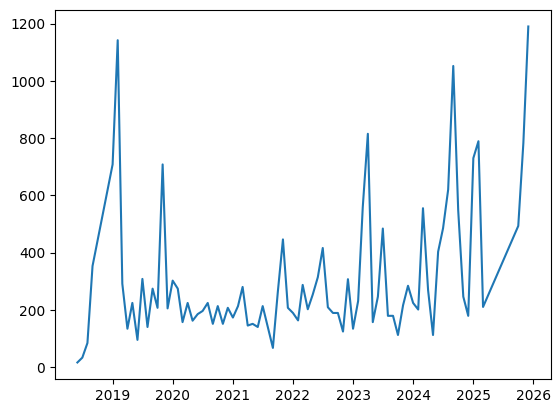

In [24]:
plt.plot(df[df['Customer_name'] == 1486].sort_index()['Purchase_amount'])
plt.show()

In [23]:
df[df['Customer_name'] == 1486].sort_index()

,Product,Customer_name,Year,Month,Quarter,Purchase_amount
date,,,,,,
2018-06-01,110100570122--AMI,1486,2018,June,2,16
2018-07-01,110100570122--AMI,1486,2018,July,3,33
2018-08-01,110100570122--AMI,1486,2018,August,3,84
2018-09-01,110100570122--AMI,1486,2018,September,3,353
2019-01-01,110100570122--AMI,1486,2019,January,1,708
...,...,...,...,...,...,...
2025-02-01,110100570122--AMI,1486,2025,February,1,789
2025-03-01,110100570122--AMI,1486,2025,March,1,210
2025-10-01,110100570122--AMI,1486,2025,October,4,493


In [3]:
df.to_csv("Sales.csv")